<a href="https://colab.research.google.com/github/arunprasath2007/pyMachineLearning/blob/master/Dogs_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 4.2MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 1.0MB 8.5MB/s 
     |████████████████████████████████| 358kB 23.8MB/s 
     |████████████████████████████████| 61kB 6.5MB/s 
     |████████████████████████████████| 40kB 5.0MB/s 
     |████████████████████████████████| 92kB 8.5MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 2.6MB 25.4MB/s 
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&respon

In [3]:
from fastbook import *
from fastai.vision.widgets import *

In [22]:
path = Path('/content/gdrive/My Drive/Dogs')
path.ls()

(#3) [Path('/content/gdrive/My Drive/Dogs/n02085936-Maltese_dog'),Path('/content/gdrive/My Drive/Dogs/n02085620-Chihuahua'),Path('/content/gdrive/My Drive/Dogs/n02085782-Japanese_spaniel')]

In [13]:
dog_images = get_image_files(path)

In [16]:
dog_images

(#589) [Path('/content/gdrive/My Drive/Dogs/n02085936-Maltese_dog/n02085936_10199.jpg'),Path('/content/gdrive/My Drive/Dogs/n02085936-Maltese_dog/n02085936_10073.jpg'),Path('/content/gdrive/My Drive/Dogs/n02085936-Maltese_dog/n02085936_10297.jpg'),Path('/content/gdrive/My Drive/Dogs/n02085936-Maltese_dog/n02085936_10273.jpg'),Path('/content/gdrive/My Drive/Dogs/n02085936-Maltese_dog/n02085936_10397.jpg'),Path('/content/gdrive/My Drive/Dogs/n02085936-Maltese_dog/n02085936_10307.jpg'),Path('/content/gdrive/My Drive/Dogs/n02085936-Maltese_dog/n02085936_10148.jpg'),Path('/content/gdrive/My Drive/Dogs/n02085936-Maltese_dog/n02085936_10130.jpg'),Path('/content/gdrive/My Drive/Dogs/n02085936-Maltese_dog/n02085936_10197.jpg'),Path('/content/gdrive/My Drive/Dogs/n02085936-Maltese_dog/n02085936_10377.jpg')...]

In [15]:
??get_image_files

In [14]:
f = verify_images(dog_images)
f

(#0) []

In [27]:
dogs = DataBlock(
    blocks= (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter= RandomSplitter(valid_pct=0.2, seed=42),
    get_y= parent_label,
    item_tfms=Resize(128)
)

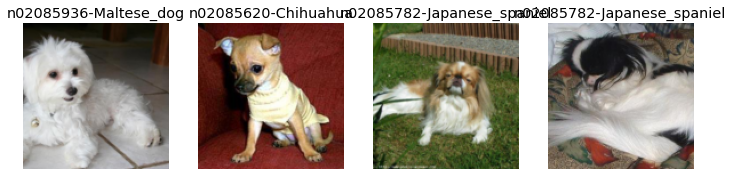

In [32]:
dls = dogs.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)


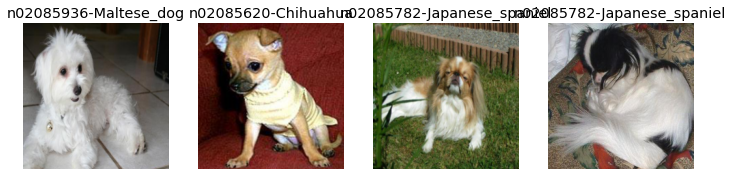

In [34]:
dogs = dogs.new(item_tfms=RandomResizedCrop(224, 0.5), batch_tfms=aug_transforms())
dls = dogs.dataloaders(path)

In [36]:
learner = cnn_learner(dls, resnet18, metrics=error_rate)
learner.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.985389,0.070585,0.034188,01:34


epoch,train_loss,valid_loss,error_rate,time
0,0.119851,0.012180,0.000000,02:09
1,0.077361,0.008064,0.000000,02:09
2,0.061763,0.004429,0.000000,02:08
3,0.054331,0.004133,0.000000,02:09


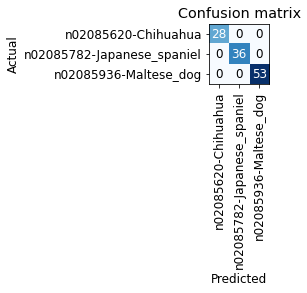

In [38]:
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.plot_confusion_matrix()

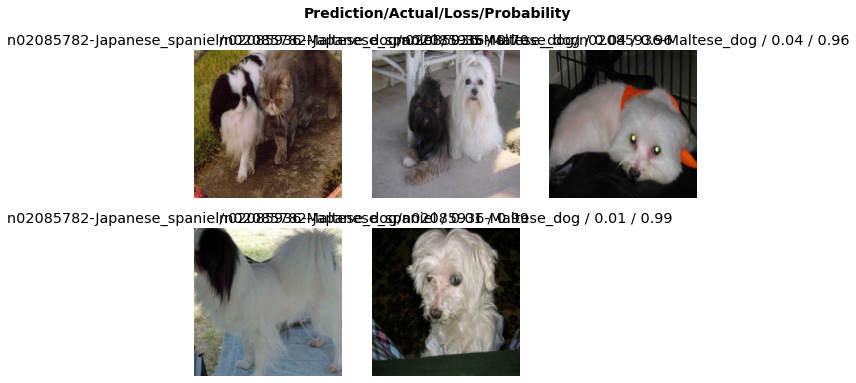

In [41]:
interpreter.plot_top_losses(5)